In [1]:
import collections
import nltk
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
stopwords = set(STOPWORDS) 

In [2]:
Gpay= pd.read_csv("/Users/meghabatra/Downloads/archive-6/GooglePayIndia.csv")
Paytm = pd.read_csv("/Users/meghabatra/Downloads/archive-6/PaytmIndia.csv")
Phonepay = pd.read_csv("/Users/meghabatra/Downloads/archive-6/PhonePayIndia.csv")

In [3]:
Gpay.head()

Unnamed: 0                                           reviewId  \
0           0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1           1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2           2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3           3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4           4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   

         userName                                          userImage  \
0      Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   
1  Benjamin Silva  https://play-lh.googleusercontent.com/a/AATXAJ...   
2    PARVESH MIAR  https://play-lh.googleusercontent.com/a-/AOh14...   
3        Mikko L.  https://play-lh.googleusercontent.com/a-/AOh14...   
4   A Google user  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0   How do add a boarding pass? I see no passes tab.      1              0   
1                                               Best      5              0   
2                                             All ok      5              0   
3  Rasy to use really... But there never, ever sh...      3              0   
4  I still do not understand why your restricting...      3            251   

  reviewCreatedVersion                   at  \
0      2.137.401329300  2021-11-18 17:03:06   
1      2.134.392709498  2021-11-18 16:43:34   
2      2.138.406141160  2021-11-18 16:12:42   
3      2.138.406141160  2021-11-18 16:06:35   
4      2.134.392709498  2021-11-18 15:48:08   

                                        replyContent            repliedAt  
0  Hi Len. Could you try the steps in this guide ...  2021-11-18 17:27:11  
1                                                NaN                  NaN  
2                                                NaN                  NaN  
3                                                NaN                  NaN  
4                                                NaN                  NaN

In [159]:
Paytm.head()

Unnamed: 0                                           reviewId  \
0           0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1           1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2           2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3           3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4           4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   

            userName                                          userImage  \
0      HARSH KASHYAP  https://play-lh.googleusercontent.com/a-/AOh14...   
1  manikeswar shabar  https://play-lh.googleusercontent.com/a-/AOh14...   
2     Rajendra Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
3       Kagga Balaji  https://play-lh.googleusercontent.com/a/AATXAJ...   
4        Ajay Pandey  https://play-lh.googleusercontent.com/a/AATXAJ...   

                         content  score  thumbsUpCount reviewCreatedVersion  \
0                             Op      5              0                  NaN   
1                           Good      5              0               9.17.3   
2  My paytm wallet app is open 😊      4              0               9.17.3   
3                          Super      5              0               9.17.3   
4                       The best      5              0               9.17.3   

                    at                                       replyContent  \
0  2021-11-18 18:42:29                                                NaN   
1  2021-11-18 18:41:39                                                NaN   
2  2021-11-18 18:41:35  Hi Rajendra! We’d like to take a closer look a...   
3  2021-11-18 18:41:33                                                NaN   
4  2021-11-18 18:41:11                                                NaN   

             repliedAt  
0                  NaN  
1                  NaN  
2  2021-11-18 16:14:32  
3                  NaN  
4                  NaN

In [160]:
Phonepay.head()

Unnamed: 0                                           reviewId  \
0           0  gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...   
1           1  gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...   
2           2  gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...   
3           3  gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...   
4           4  gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...   

         userName                                          userImage  \
0       Akki Love  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  datta samindar  https://play-lh.googleusercontent.com/a-/AOh14...   
2    Rahul Jadhav  https://play-lh.googleusercontent.com/a-/AOh14...   
3  Rao Farman Ali  https://play-lh.googleusercontent.com/a-/AOh14...   
4  Tapaswini Rana  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                             content  score  thumbsUpCount  \
0                                           Nice app      5              0   
1                                                Sup      5              0   
2                                                  😤      1              0   
3  मेरे खाते से पैसे कट गए और जिसे मैने पैसे भेजे...      1              0   
4                                 Useful application      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  
0               4.0.18  2021-11-18 18:37:42          NaN       NaN  
1                  NaN  2021-11-18 18:37:35          NaN       NaN  
2               4.1.23  2021-11-18 18:36:58          NaN       NaN  
3               4.1.25  2021-11-18 18:36:22          NaN       NaN  
4               4.1.25  2021-11-18 18:35:39          NaN       NaN

In [289]:
Gpay.rename(columns={'Unnamed:':'S.No','reviewId':'ReviewID',"userName" : "UserName",
             "userImage":"UserImage","content" :"Content","score": "Score",
             "thumbsUpCount" : "ThumpsUpCount","reviewCreatedVersion":"ReviewVersion", 
             "at" : "Date","replyContent":"Reply","repliedAt" :"ReplyDate"})
#print(Gpay.columns)            

Unnamed: 0                                           ReviewID  \
0               0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1               1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2               2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3               3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4               4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   
...           ...                                                ...   
34223       34223  gp:AOqpTOEXYnopFG3RZ8fVrBC9yqXnVjmhnDI0Ji99tXb...   
34224       34224  gp:AOqpTOEVXSkb09ThJsY2TZ0awLgMSCO0qzySxtcT7x9...   
34225       34225  gp:AOqpTOHv3DyIxgg2a61I_QQGgjbFodIUp6UlaUpd4M9...   
34226       34226  gp:AOqpTOHEnAmESklDXdnvO13QBDl9gOlH4M1qQs-gMYS...   
34227       34227  gp:AOqpTOHfgaMoLANmo4v7W91hqWvHFJ7ogUmKQ7fvcNo...   

             UserName                                          UserImage  \
0          Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   
1      Benjamin Silva  https://play-lh.googleusercontent.com/a/AATXAJ...   
2        PARVESH MIAR  https://play-lh.googleusercontent.com/a-/AOh14...   
3            Mikko L.  https://play-lh.googleusercontent.com/a-/AOh14...   
4       A Google user  https://play-lh.googleusercontent.com/EGemoI2N...   
...               ...                                                ...   
34223     Daran Smith  https://play-lh.googleusercontent.com/a-/AOh14...   
34224       Judi Anne  https://play-lh.googleusercontent.com/a-/AOh14...   
34225       Noori Lal  https://play-lh.googleusercontent.com/a-/AOh14...   
34226   Josh Phillips  https://play-lh.googleusercontent.com/a-/AOh14...   
34227   Saeed Aljasmi  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                                 Content  Score  \
0       How do add a boarding pass? I see no passes tab.      1   
1                                                   Best      5   
2                                                 All ok      5   
3      Rasy to use really... But there never, ever sh...      3   
4      I still do not understand why your restricting...      3   
...                                                  ...    ...   
34223                                   Like it good app      5   
34224                         Excellent very easy to use      5   
34225                                       Easy to use.      5   
34226                                Works how it should      5   
34227                                               Best      5   

       ThumpsUpCount    ReviewVersion                 Date  \
0                  0  2.137.401329300  2021-11-18 17:03:06   
1                  0  2.134.392709498  2021-11-18 16:43:34   
2                  0  2.138.406141160  2021-11-18 16:12:42   
3                  0  2.138.406141160  2021-11-18 16:06:35   
4                251  2.134.392709498  2021-11-18 15:48:08   
...              ...              ...                  ...   
34223              0   2.96.264233179  2019-10-01 02:47:10   
34224              0   2.95.262992467  2019-10-01 02:38:48   
34225              0   2.96.264233179  2019-10-01 02:17:54   
34226              0   2.96.264233179  2019-10-01 02:09:34   
34227              0   2.96.264233179  2019-10-01 02:06:57   

                                                   Reply            ReplyDate  
0      Hi Len. Could you try the steps in this guide ...  2021-11-18 17:27:11  
1                                                    NaN                  NaN  
2                                                    NaN                  NaN  
3                                                    NaN                  NaN  
4                                                    NaN                  NaN  
...                                                  ...                  ...  
34223                                                NaN                  NaN  
34224                                  

In [517]:
Gpay.head()

Unnamed: 0                                           reviewId  \
0           0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1           1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2           2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3           3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4           4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   

         userName                                          userImage  \
0      Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   
1  Benjamin Silva  https://play-lh.googleusercontent.com/a/AATXAJ...   
2    PARVESH MIAR  https://play-lh.googleusercontent.com/a-/AOh14...   
3        Mikko L.  https://play-lh.googleusercontent.com/a-/AOh14...   
4   A Google user  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0   How do add a boarding pass? I see no passes tab.      1              0   
1                                               Best      5              0   
2                                             All ok      5              0   
3  Rasy to use really... But there never, ever sh...      3              0   
4  I still do not understand why your restricting...      3            251   

  reviewCreatedVersion                   at  \
0      2.137.401329300  2021-11-18 17:03:06   
1      2.134.392709498  2021-11-18 16:43:34   
2      2.138.406141160  2021-11-18 16:12:42   
3      2.138.406141160  2021-11-18 16:06:35   
4      2.134.392709498  2021-11-18 15:48:08   

                                        replyContent            repliedAt  
0  Hi Len. Could you try the steps in this guide ...  2021-11-18 17:27:11  
1                                                NaN                  NaN  
2                                                NaN                  NaN  
3                                                NaN                  NaN  
4                                                NaN                  NaN

In [12]:
Paytm.rename(columns={'Unnamed:':'S.No','reviewId':'ReviewID',"userName" : "UserName",
             "userImage":"UserImage","content" :"Content","score": "Score",
             "thumbsUpCount" : "ThumpsUpCount","reviewCreatedVersion":"ReviewVersion", 
             "at" : "Date","replyContent":"Reply","repliedAt" :"ReplyDate"})

Unnamed: 0                                           ReviewID  \
0                0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1                1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2                2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3                3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4                4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   
...            ...                                                ...   
137902      137902  gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...   
137903      137903  gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...   
137904      137904  gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...   
137905      137905  gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...   
137906      137906  gp:AOqpTOGE2tN9jd6zjW7p8rt2MUZgmSe_cKre-Cl7Ctt...   

                 UserName                                          UserImage  \
0           HARSH KASHYAP  https://play-lh.googleusercontent.com/a-/AOh14...   
1       manikeswar shabar  https://play-lh.googleusercontent.com/a-/AOh14...   
2          Rajendra Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
3            Kagga Balaji  https://play-lh.googleusercontent.com/a/AATXAJ...   
4             Ajay Pandey  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
137902   Gajendra Kilbile  https://play-lh.googleusercontent.com/a-/AOh14...   
137903       Pratixa Dhak  https://play-lh.googleusercontent.com/a-/AOh14...   
137904          Srinu Sri  https://play-lh.googleusercontent.com/a-/AOh14...   
137905        Sagar Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
137906          HK RAJPUT  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                  Content  Score  \
0                                                      Op      5   
1                                                    Good      5   
2                           My paytm wallet app is open 😊      4   
3                                                   Super      5   
4                                                The best      5   
...                                                   ...    ...   
137902                                               Good      5   
137903  Unable to use or reddem cashback points..too b...      1   
137904                                              super      5   
137905                                               Nice      5   
137906                                               Good      5   

        ThumpsUpCount ReviewVersion                 Date  \
0                   0           NaN  2021-11-18 18:42:29   
1                   0        9.17.3  2021-11-18 18:41:39   
2                   0        9.17.3  2021-11-18 18:41:35   
3                   0        9.17.3  2021-11-18 18:41:33   
4                   0        9.17.3  2021-11-18 18:41:11   
...               ...           ...                  ...   
137902              0        9.10.2  2021-07-29 21:29:25   
137903              0           NaN  2021-07-29 21:28:53   
137904              0           NaN  2021-07-29 21:27:39   
137905              0        9.10.2  2021-07-29 21:27:20   
137906              0           NaN  2021-07-29 21:27:00   

                                                    Reply            ReplyDate  
0                                                     NaN                  NaN  
1                                                     NaN                  NaN  
2       Hi Rajendra! We’d like to take a closer look a...  2021-11-18 16:14:32  
3                                                     NaN                  NaN  
4                                                     NaN                  NaN  
...                                                   ...                  ...  
137902  Awesome! It's been our pleasure. You can also ...  2021-0

In [13]:
Phonepay.rename(columns={'Unnamed:':'S.No','reviewId':'ReviewID',"userName" : "UserName",
             "userImage":"UserImage","content" :"Content","score": "Score",
             "thumbsUpCount" : "ThumpsUpCount","reviewCreatedVersion":"ReviewVersion", 
             "at" : "Date","replyContent":"Reply","repliedAt" :"ReplyDate"})

Unnamed: 0                                           ReviewID  \
0               0  gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...   
1               1  gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...   
2               2  gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...   
3               3  gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...   
4               4  gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...   
...           ...                                                ...   
11736       11736  gp:AOqpTOEI3U9pLM_RUp8LcwRgbDyaImBZQlgPh1lhVUA...   
11737       11737  gp:AOqpTOFuSV_9Lt31JbHaR000CauJbntWPTdISIwneYE...   
11738       11738  gp:AOqpTOEdjlMnAP0bMX4oKZ2eOEUtZvfJjzGjsljWCKK...   
11739       11739  gp:AOqpTOH6bRKH7nM-B6306EUk-mSMrKejmGMyDm2u-iK...   
11740       11740  gp:AOqpTOEMimszwKu5Az9tXim_1Wd0snjEVVmA_7JfIup...   

                 UserName                                          UserImage  \
0               Akki Love  https://play-lh.googleusercontent.com/a/AATXAJ...   
1          datta samindar  https://play-lh.googleusercontent.com/a-/AOh14...   
2            Rahul Jadhav  https://play-lh.googleusercontent.com/a-/AOh14...   
3          Rao Farman Ali  https://play-lh.googleusercontent.com/a-/AOh14...   
4          Tapaswini Rana  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
11736         Ashok Pawar  https://play-lh.googleusercontent.com/a-/AOh14...   
11737         Tabish Khan  https://play-lh.googleusercontent.com/a-/AOh14...   
11738  Kiran Shinde Patil  https://play-lh.googleusercontent.com/a-/AOh14...   
11739          The Indian  https://play-lh.googleusercontent.com/a-/AOh14...   
11740  Nageshwarao Samala  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                                 Content  Score  \
0                                               Nice app      5   
1                                                    Sup      5   
2                                                      😤      1   
3      मेरे खाते से पैसे कट गए और जिसे मैने पैसे भेजे...      1   
4                                     Useful application      5   
...                                                  ...    ...   
11736                                               good      5   
11737                                   Simply awesome 😎      5   
11738                                              Super      1   
11739                                          Excellent      5   
11740                                                 Ok      4   

       ThumpsUpCount ReviewVersion                 Date  \
0                  0        4.0.18  2021-11-18 18:37:42   
1                  0           NaN  2021-11-18 18:37:35   
2                  0        4.1.23  2021-11-18 18:36:58   
3                  0        4.1.25  2021-11-18 18:36:22   
4                  0        4.1.25  2021-11-18 18:35:39   
...              ...           ...                  ...   
11736              0        4.1.25  2021-11-10 15:27:29   
11737              0        4.1.25  2021-11-10 15:27:27   
11738              0        4.1.25  2021-11-10 15:26:55   
11739              0        4.1.18  2021-11-10 15:23:32   
11740              0        4.1.25  2021-11-10 15:22:05   

                                                   Reply            ReplyDate  
0                                                    NaN                  NaN  
1                                                    NaN                  NaN  
2                                                    NaN                  NaN  
3                                                    NaN                  NaN  
4                                                    NaN                  NaN  
...                                                  ...                  ...  
11736                                                NaN                  NaN  
11737                      

In [161]:
Gpay["content"]=Gpay['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [162]:
Gpay.head()

Unnamed: 0                                           reviewId  \
0           0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1           1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2           2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3           3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4           4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   

         userName                                          userImage  \
0      Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   
1  Benjamin Silva  https://play-lh.googleusercontent.com/a/AATXAJ...   
2    PARVESH MIAR  https://play-lh.googleusercontent.com/a-/AOh14...   
3        Mikko L.  https://play-lh.googleusercontent.com/a-/AOh14...   
4   A Google user  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0   How do add a boarding pass? I see no passes tab.      1              0   
1                                               Best      5              0   
2                                             All ok      5              0   
3  Rasy to use really... But there never, ever sh...      3              0   
4  I still do not understand why your restricting...      3            251   

  reviewCreatedVersion                   at  \
0      2.137.401329300  2021-11-18 17:03:06   
1      2.134.392709498  2021-11-18 16:43:34   
2      2.138.406141160  2021-11-18 16:12:42   
3      2.138.406141160  2021-11-18 16:06:35   
4      2.134.392709498  2021-11-18 15:48:08   

                                        replyContent            repliedAt  
0  Hi Len. Could you try the steps in this guide ...  2021-11-18 17:27:11  
1                                                NaN                  NaN  
2                                                NaN                  NaN  
3                                                NaN                  NaN  
4                                                NaN                  NaN

In [163]:
Paytm['content'] = Paytm['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [164]:
Paytm

Unnamed: 0                                           reviewId  \
0                0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1                1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2                2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3                3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4                4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   
...            ...                                                ...   
137902      137902  gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...   
137903      137903  gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...   
137904      137904  gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...   
137905      137905  gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...   
137906      137906  gp:AOqpTOGE2tN9jd6zjW7p8rt2MUZgmSe_cKre-Cl7Ctt...   

                 userName                                          userImage  \
0           HARSH KASHYAP  https://play-lh.googleusercontent.com/a-/AOh14...   
1       manikeswar shabar  https://play-lh.googleusercontent.com/a-/AOh14...   
2          Rajendra Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
3            Kagga Balaji  https://play-lh.googleusercontent.com/a/AATXAJ...   
4             Ajay Pandey  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
137902   Gajendra Kilbile  https://play-lh.googleusercontent.com/a-/AOh14...   
137903       Pratixa Dhak  https://play-lh.googleusercontent.com/a-/AOh14...   
137904          Srinu Sri  https://play-lh.googleusercontent.com/a-/AOh14...   
137905        Sagar Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
137906          HK RAJPUT  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                  content  score  \
0                                                      Op      5   
1                                                    Good      5   
2                            My paytm wallet app is open       4   
3                                                   Super      5   
4                                                The best      5   
...                                                   ...    ...   
137902                                               Good      5   
137903  Unable to use or reddem cashback points..too b...      1   
137904                                              super      5   
137905                                               Nice      5   
137906                                               Good      5   

        thumbsUpCount reviewCreatedVersion                   at  \
0                   0                  NaN  2021-11-18 18:42:29   
1                   0               9.17.3  2021-11-18 18:41:39   
2                   0               9.17.3  2021-11-18 18:41:35   
3                   0               9.17.3  2021-11-18 18:41:33   
4                   0               9.17.3  2021-11-18 18:41:11   
...               ...                  ...                  ...   
137902              0               9.10.2  2021-07-29 21:29:25   
137903              0                  NaN  2021-07-29 21:28:53   
137904              0                  NaN  2021-07-29 21:27:39   
137905              0               9.10.2  2021-07-29 21:27:20   
137906              0                  NaN  2021-07-29 21:27:00   

                                             replyContent            repliedAt  
0                                                     NaN                  NaN  
1                                                     NaN                  NaN  
2       Hi Rajendra! We’d like to take a closer look a...  2021-11-18 16:14:32  
3                                                     NaN                  NaN  
4                                                     NaN                  NaN  
...                                                   ...     

In [165]:
Phonepay["content"]=Phonepay['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [166]:
Phonepay

Unnamed: 0                                           reviewId  \
0               0  gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...   
1               1  gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...   
2               2  gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...   
3               3  gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...   
4               4  gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...   
...           ...                                                ...   
11736       11736  gp:AOqpTOEI3U9pLM_RUp8LcwRgbDyaImBZQlgPh1lhVUA...   
11737       11737  gp:AOqpTOFuSV_9Lt31JbHaR000CauJbntWPTdISIwneYE...   
11738       11738  gp:AOqpTOEdjlMnAP0bMX4oKZ2eOEUtZvfJjzGjsljWCKK...   
11739       11739  gp:AOqpTOH6bRKH7nM-B6306EUk-mSMrKejmGMyDm2u-iK...   
11740       11740  gp:AOqpTOEMimszwKu5Az9tXim_1Wd0snjEVVmA_7JfIup...   

                 userName                                          userImage  \
0               Akki Love  https://play-lh.googleusercontent.com/a/AATXAJ...   
1          datta samindar  https://play-lh.googleusercontent.com/a-/AOh14...   
2            Rahul Jadhav  https://play-lh.googleusercontent.com/a-/AOh14...   
3          Rao Farman Ali  https://play-lh.googleusercontent.com/a-/AOh14...   
4          Tapaswini Rana  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
11736         Ashok Pawar  https://play-lh.googleusercontent.com/a-/AOh14...   
11737         Tabish Khan  https://play-lh.googleusercontent.com/a-/AOh14...   
11738  Kiran Shinde Patil  https://play-lh.googleusercontent.com/a-/AOh14...   
11739          The Indian  https://play-lh.googleusercontent.com/a-/AOh14...   
11740  Nageshwarao Samala  https://play-lh.googleusercontent.com/a/AATXAJ...   

                  content  score  thumbsUpCount reviewCreatedVersion  \
0                Nice app      5              0               4.0.18   
1                     Sup      5              0                  NaN   
2                              1              0               4.1.23   
3                              1              0               4.1.25   
4      Useful application      5              0               4.1.25   
...                   ...    ...            ...                  ...   
11736                good      5              0               4.1.25   
11737     Simply awesome       5              0               4.1.25   
11738               Super      1              0               4.1.25   
11739           Excellent      5              0               4.1.18   
11740                  Ok      4              0               4.1.25   

                        at                                       replyContent  \
0      2021-11-18 18:37:42                                                NaN   
1      2021-11-18 18:37:35                                                NaN   
2      2021-11-18 18:36:58                                                NaN   
3      2021-11-18 18:36:22                                                NaN   
4      2021-11-18 18:35:39                                                NaN   
...                    ...                                                ...   
11736  2021-11-10 15:27:29                                                NaN   
11737  2021-11-10 15:27:27                                                NaN   
11738  2021-11-10 15:26:55  Thank you for the feedback, Kiran. We work har...   
11739  2021-11-10 15:23:32                                                NaN   
11740  2021-11-10 15:22:05                                                NaN   

                 repliedAt  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
11736                  NaN  
11737                  NaN  
11738  2021-11-10 15:40:13  
11739                  NaN  
11740                  N

In [167]:
Gpay.shape

(34228, 11)

In [168]:
Paytm.shape

(137907, 11)

In [169]:
Phonepay.shape

(11741, 11)

In [170]:
Gpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            34228 non-null  int64 
 1   reviewId              34228 non-null  object
 2   userName              34227 non-null  object
 3   userImage             34228 non-null  object
 4   content               34223 non-null  object
 5   score                 34228 non-null  int64 
 6   thumbsUpCount         34228 non-null  int64 
 7   reviewCreatedVersion  29987 non-null  object
 8   at                    34228 non-null  object
 9   replyContent          6112 non-null   object
 10  repliedAt             6112 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [171]:
Paytm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137907 entries, 0 to 137906
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            137907 non-null  int64 
 1   reviewId              137907 non-null  object
 2   userName              137907 non-null  object
 3   userImage             137907 non-null  object
 4   content               137905 non-null  object
 5   score                 137907 non-null  int64 
 6   thumbsUpCount         137907 non-null  int64 
 7   reviewCreatedVersion  114242 non-null  object
 8   at                    137907 non-null  object
 9   replyContent          68127 non-null   object
 10  repliedAt             68127 non-null   object
dtypes: int64(3), object(8)
memory usage: 11.6+ MB


In [172]:
Phonepay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11741 entries, 0 to 11740
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            11741 non-null  int64 
 1   reviewId              11741 non-null  object
 2   userName              11741 non-null  object
 3   userImage             11741 non-null  object
 4   content               11741 non-null  object
 5   score                 11741 non-null  int64 
 6   thumbsUpCount         11741 non-null  int64 
 7   reviewCreatedVersion  9605 non-null   object
 8   at                    11741 non-null  object
 9   replyContent          2936 non-null   object
 10  repliedAt             2936 non-null   object
dtypes: int64(3), object(8)
memory usage: 1009.1+ KB


In [173]:
Gpay.isnull().sum()

Unnamed: 0                  0
reviewId                    0
userName                    1
userImage                   0
content                     5
score                       0
thumbsUpCount               0
reviewCreatedVersion     4241
at                          0
replyContent            28116
repliedAt               28116
dtype: int64

In [174]:
Paytm.isnull().sum()

Unnamed: 0                  0
reviewId                    0
userName                    0
userImage                   0
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    23665
at                          0
replyContent            69780
repliedAt               69780
dtype: int64

In [175]:
Phonepay.isnull().sum()

Unnamed: 0                 0
reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2136
at                         0
replyContent            8805
repliedAt               8805
dtype: int64

In [4]:
Googlepay = Gpay["score"].value_counts().reset_index()
Googlepay


index  score
0      5  19046
1      1   8618
2      4   3043
3      3   1928
4      2   1593

In [5]:
Googlepay.columns = ["Score", "Count"]

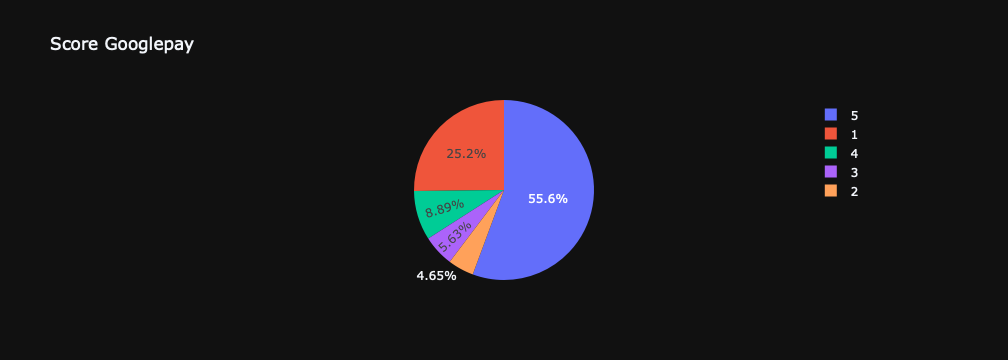

In [6]:
px.pie(Googlepay,
       names='Score',
       values='Count',
      template='plotly_dark',
      title='Score Googlepay')

In [7]:
Paytm_india = Paytm["score"].value_counts().reset_index()
Paytm_india

index  score
0      5  99587
1      1  17499
2      4  13640
3      3   4554
4      2   2627

In [8]:
Paytm_india.columns = ["Score", "Count"]

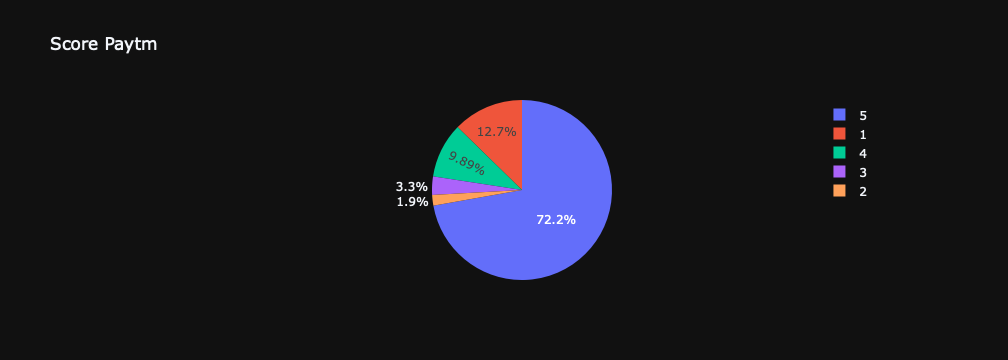

In [9]:
px.pie(Paytm_india,
       names='Score',
       values='Count',
      template='plotly_dark',
      title='Score Paytm')

In [10]:
Phonepay_india = Phonepay["score"].value_counts().reset_index()
Phonepay_india

index  score
0      5   7699
1      1   1765
2      4   1483
3      3    517
4      2    277

In [11]:
Phonepay_india.columns = ["Score", "Count"]

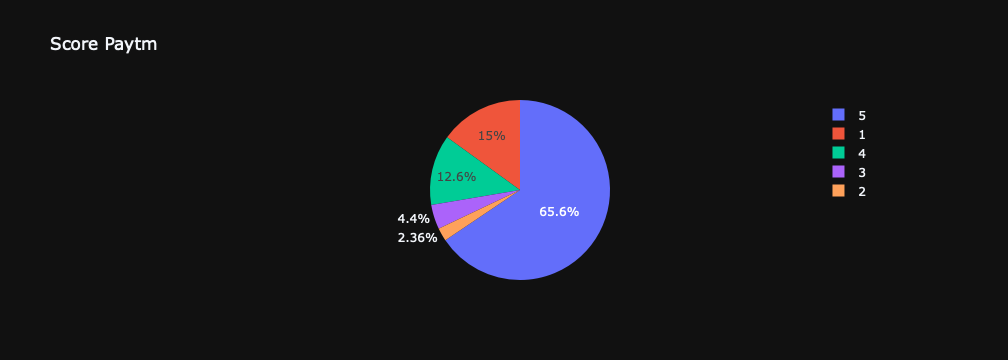

In [12]:
px.pie(Phonepay_india,
       names='Score',
       values='Count',
       template='plotly_dark',
       title='Score Paytm')

In [224]:
Gpay["Content_nopuncuation"] = Gpay['content'].str.replace('[^\w\s]','')
Gpay['Content_'] = Gpay['Content_nopuncuation'].str.replace('\d+', '')
Gpay["Content_"] = Gpay["Content_"].str.lower()
Gpay

<ipython-input-224-c05e56f3c94d>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-224-c05e56f3c94d>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Unnamed: 0                                           reviewId  \
0               0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1               1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2               2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3               3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4               4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   
...           ...                                                ...   
34223       34223  gp:AOqpTOEXYnopFG3RZ8fVrBC9yqXnVjmhnDI0Ji99tXb...   
34224       34224  gp:AOqpTOEVXSkb09ThJsY2TZ0awLgMSCO0qzySxtcT7x9...   
34225       34225  gp:AOqpTOHv3DyIxgg2a61I_QQGgjbFodIUp6UlaUpd4M9...   
34226       34226  gp:AOqpTOHEnAmESklDXdnvO13QBDl9gOlH4M1qQs-gMYS...   
34227       34227  gp:AOqpTOHfgaMoLANmo4v7W91hqWvHFJ7ogUmKQ7fvcNo...   

             userName                                          userImage  \
0          Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   
1      Benjamin Silva  https://play-lh.googleusercontent.com/a/AATXAJ...   
2        PARVESH MIAR  https://play-lh.googleusercontent.com/a-/AOh14...   
3            Mikko L.  https://play-lh.googleusercontent.com/a-/AOh14...   
4       A Google user  https://play-lh.googleusercontent.com/EGemoI2N...   
...               ...                                                ...   
34223     Daran Smith  https://play-lh.googleusercontent.com/a-/AOh14...   
34224       Judi Anne  https://play-lh.googleusercontent.com/a-/AOh14...   
34225       Noori Lal  https://play-lh.googleusercontent.com/a-/AOh14...   
34226   Josh Phillips  https://play-lh.googleusercontent.com/a-/AOh14...   
34227   Saeed Aljasmi  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                                 content  score  \
0       how do add a boarding pass? i see no passes tab.      1   
1                                                   best      5   
2                                                 all ok      5   
3      rasy to use really... but there never, ever sh...      3   
4      i still do not understand why your restricting...      3   
...                                                  ...    ...   
34223                                   like it good app      5   
34224                         excellent very easy to use      5   
34225                                       easy to use.      5   
34226                                works how it should      5   
34227                                               best      5   

       thumbsUpCount reviewCreatedVersion                   at  \
0                  0      2.137.401329300  2021-11-18 17:03:06   
1                  0      2.134.392709498  2021-11-18 16:43:34   
2                  0      2.138.406141160  2021-11-18 16:12:42   
3                  0      2.138.406141160  2021-11-18 16:06:35   
4                251      2.134.392709498  2021-11-18 15:48:08   
...              ...                  ...                  ...   
34223              0       2.96.264233179  2019-10-01 02:47:10   
34224              0       2.95.262992467  2019-10-01 02:38:48   
34225              0       2.96.264233179  2019-10-01 02:17:54   
34226              0       2.96.264233179  2019-10-01 02:09:34   
34227              0       2.96.264233179  2019-10-01 02:06:57   

                                            replyContent            repliedAt  \
0      Hi Len. Could you try the steps in this guide ...  2021-11-18 17:27:11   
1                                                    NaN                  NaN   
2                                                    NaN                  NaN   
3                                                    NaN                  NaN   
4                                                    NaN                  NaN   
...                                                  ...                  ...   
34223                                                NaN        

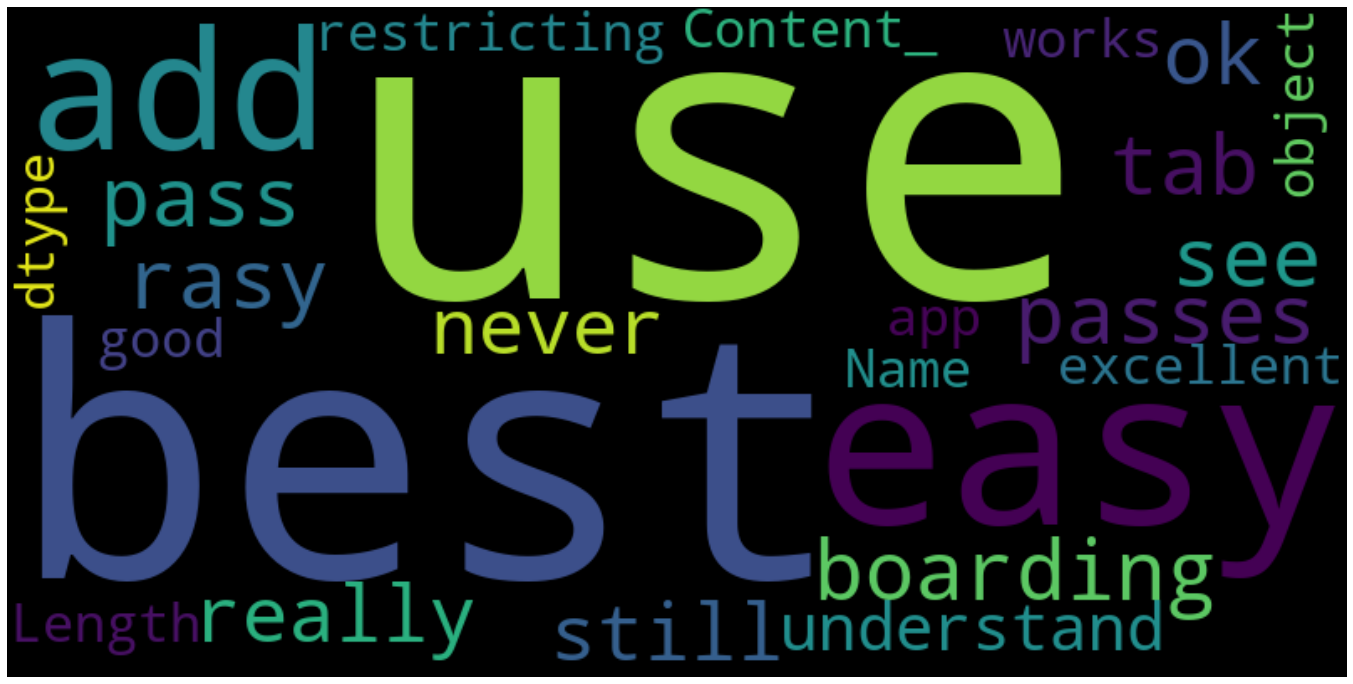

In [225]:

wordcloud = WordCloud(width = 800, height = 400, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 200,
            min_font_size = 1).generate(str(Gpay["Content_"]))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation ="bilinear")
plt.axis("off")
plt.show()

In [226]:
filtered_words = Gpay["Content_"].apply(lambda x: [word for word in str(x).split(" ") if word not in stopwords])
filtered_words



0                  [add, boarding, pass, see, passes, tab]
1                                                   [best]
2                                                     [ok]
3        [rasy, use, really, never, baddata, among, app...
4        [still, understand, restricting, certain, lega...
                               ...                        
34223                                          [good, app]
34224                               [excellent, easy, use]
34225                                          [easy, use]
34226                                              [works]
34227                                               [best]
Name: Content_, Length: 34228, dtype: object

In [227]:
wordcount = filtered_words.sum()
counted_words = collections.Counter(wordcount)

In [228]:
wordcount = []
for i in filtered_words:
    for j in i:
        wordcount.append(j)
            
counted_words = collections.Counter(wordcount)
print(counted_words)
   

   
    




Counter({'': 10245, 'app': 9105, 'pay': 6056, 'google': 5854, 'use': 5719, 'card': 4915, 'easy': 3897, 'great': 3218, 'good': 3063, 'phone': 3025, 'works': 2534, 'work': 2230, 'cards': 2171, 'cant': 2080, 'love': 2060, 'dont': 1955, 'time': 1865, 'now': 1834, 'money': 1799, 'payment': 1682, 'doesnt': 1426, 'bank': 1382, 'used': 1364, 'using': 1361, 'new': 1309, 'one': 1290, 'even': 1281, 'add': 1260, 'im': 1205, 'will': 1203, 'convenient': 1171, 'working': 1128, 'account': 1118, 'need': 1097, 'way': 1010, 'wallet': 1004, 'still': 986, 'update': 950, 'never': 941, 'well': 908, 'really': 902, 'set': 866, 'credit': 830, 'fast': 824, 'make': 823, 'wont': 810, 'want': 799, 'samsung': 795, 'ive': 780, 'awesome': 770, 'payments': 761, 'please': 756, 'worked': 756, 'tried': 747, 'help': 715, 'far': 695, 'first': 682, 'much': 681, 'back': 676, 'quick': 670, 'apps': 669, 'excellent': 666, 'support': 652, 'every': 651, 'nfc': 651, 'times': 651, 'better': 645, 'able': 640, 'store': 640, 'says': 63

In [229]:
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)


In [271]:
counted_words.most_common(20)

[('', 10245),
 ('app', 9105),
 ('pay', 6056),
 ('google', 5854),
 ('use', 5719),
 ('card', 4915),
 ('easy', 3897),
 ('great', 3218),
 ('good', 3063),
 ('phone', 3025),
 ('works', 2534),
 ('work', 2230),
 ('cards', 2171),
 ('cant', 2080),
 ('love', 2060),
 ('dont', 1955),
 ('time', 1865),
 ('now', 1834),
 ('money', 1799),
 ('payment', 1682)]

<BarContainer object of 10 artists>

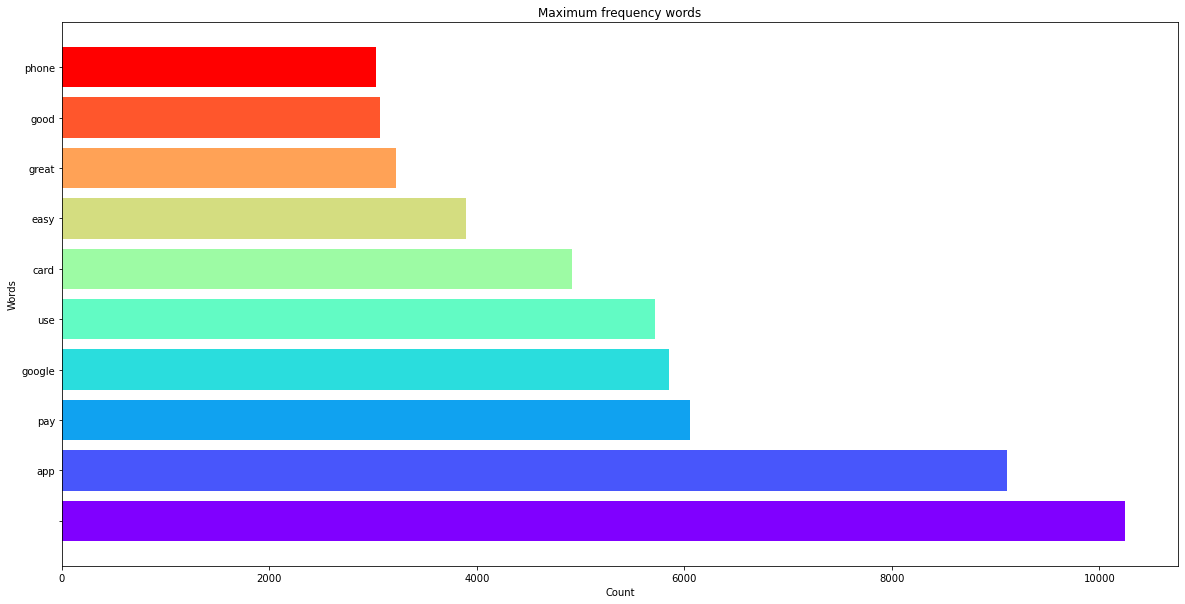

In [231]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Maximum frequency words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [205]:
Paytm["Content_nopuncuation"] = Paytm['content'].str.replace('[^\w\s]','')
Paytm['Content_'] = Paytm['Content_nopuncuation'].str.replace('\d+', '')
Paytm["Content_"] = Paytm["Content_"].str.lower()
Paytm

<ipython-input-205-8e819e73b6a7>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-205-8e819e73b6a7>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Unnamed: 0                                           reviewId  \
0                0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1                1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2                2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3                3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4                4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   
...            ...                                                ...   
137902      137902  gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...   
137903      137903  gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...   
137904      137904  gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...   
137905      137905  gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...   
137906      137906  gp:AOqpTOGE2tN9jd6zjW7p8rt2MUZgmSe_cKre-Cl7Ctt...   

                 userName                                          userImage  \
0           HARSH KASHYAP  https://play-lh.googleusercontent.com/a-/AOh14...   
1       manikeswar shabar  https://play-lh.googleusercontent.com/a-/AOh14...   
2          Rajendra Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
3            Kagga Balaji  https://play-lh.googleusercontent.com/a/AATXAJ...   
4             Ajay Pandey  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
137902   Gajendra Kilbile  https://play-lh.googleusercontent.com/a-/AOh14...   
137903       Pratixa Dhak  https://play-lh.googleusercontent.com/a-/AOh14...   
137904          Srinu Sri  https://play-lh.googleusercontent.com/a-/AOh14...   
137905        Sagar Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
137906          HK RAJPUT  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                  content  score  \
0                                                      Op      5   
1                                                    Good      5   
2                            My paytm wallet app is open       4   
3                                                   Super      5   
4                                                The best      5   
...                                                   ...    ...   
137902                                               Good      5   
137903  Unable to use or reddem cashback points..too b...      1   
137904                                              super      5   
137905                                               Nice      5   
137906                                               Good      5   

        thumbsUpCount reviewCreatedVersion                   at  \
0                   0                  NaN  2021-11-18 18:42:29   
1                   0               9.17.3  2021-11-18 18:41:39   
2                   0               9.17.3  2021-11-18 18:41:35   
3                   0               9.17.3  2021-11-18 18:41:33   
4                   0               9.17.3  2021-11-18 18:41:11   
...               ...                  ...                  ...   
137902              0               9.10.2  2021-07-29 21:29:25   
137903              0                  NaN  2021-07-29 21:28:53   
137904              0                  NaN  2021-07-29 21:27:39   
137905              0               9.10.2  2021-07-29 21:27:20   
137906              0                  NaN  2021-07-29 21:27:00   

                                             replyContent  \
0                                                     NaN   
1                                                     NaN   
2       Hi Rajendra! We’d like to take a closer look a...   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
137902  Awesome! It's been our pleasure. You can also ...   
137903  Hi! We’d like to take a closer look and help y...   

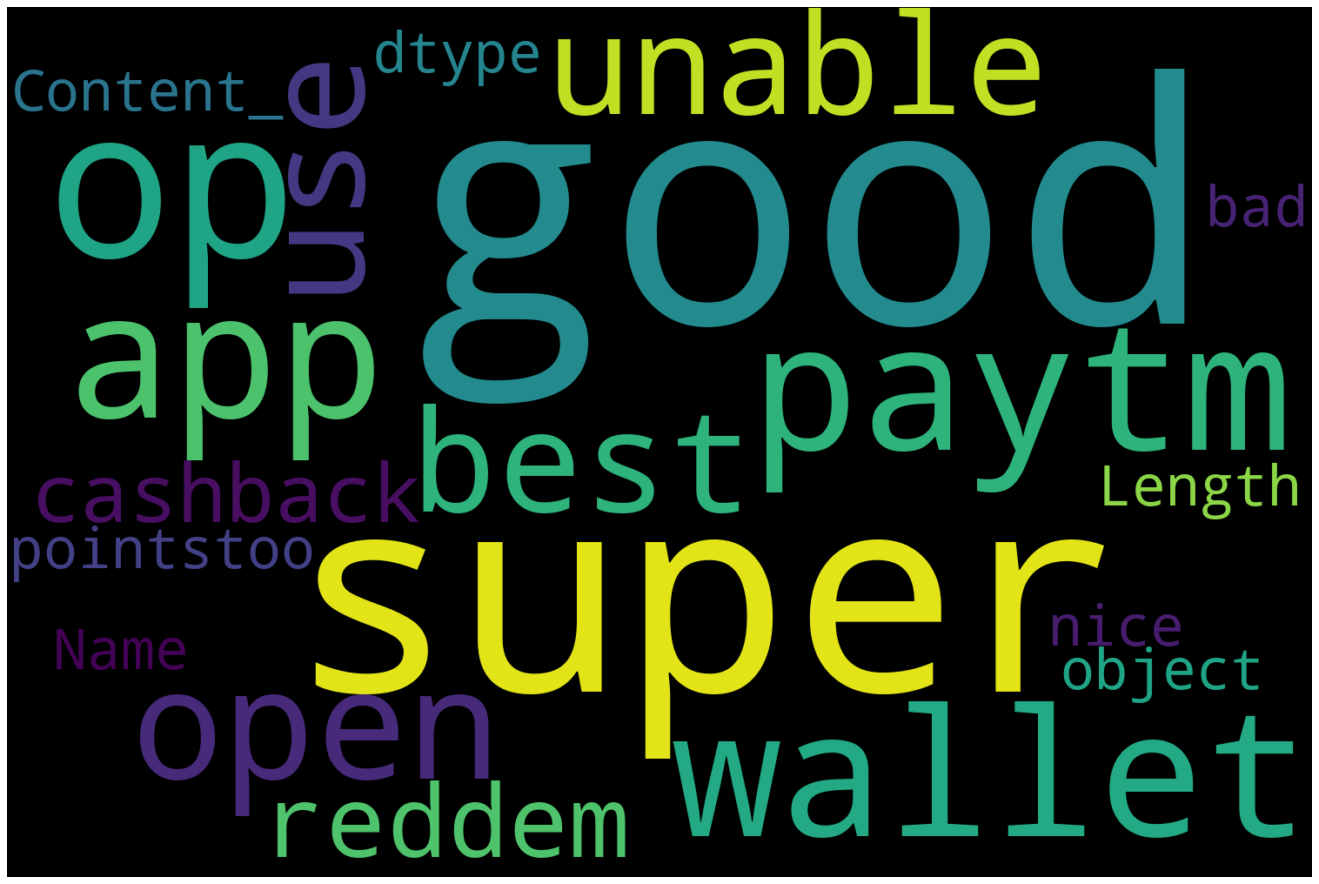

In [206]:
wordcloud = WordCloud(width = 1500, height = 1000, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 300,
            min_font_size = 1).generate(str(Paytm["Content_"]))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.show()

In [207]:
filtered_words1 = Paytm["Content_"].apply(lambda x: [word for word in str(x).split(" ") if word not in stopwords])
filtered_words

0                  [add, boarding, pass, see, passes, tab]
1                                                   [best]
2                                                     [ok]
3        [rasy, use, really, never, baddata, among, app...
4        [still, understand, restricting, certain, lega...
                               ...                        
34223                                          [good, app]
34224                               [excellent, easy, use]
34225                                          [easy, use]
34226                                              [works]
34227                                               [best]
Name: Content_, Length: 34228, dtype: object

In [209]:
wordcount2 = []
for i in filtered_words1:
    for j in i:
        wordcount2.append(j)
            
counted_words = collections.Counter(wordcount2)
print(counted_words)

Counter({'good': 38269, '': 31120, 'app': 27605, 'nice': 20022, 'paytm': 11970, 'best': 7027, 'super': 5941, 'payment': 5494, 'service': 5131, 'money': 4872, 'excellent': 4321, 'use': 3715, 'fast': 3446, 'easy': 3302, 'account': 2943, 'customer': 2920, 'experience': 2516, 'worst': 2484, 'bad': 2406, 'ok': 2363, 'awesome': 2325, 'great': 2245, 'please': 2207, 'bank': 2200, 'pay': 2159, 'cashback': 2158, 'application': 2084, 'hai': 2078, 'time': 2040, 'aap': 1952, 'dont': 1905, 'one': 1767, 'care': 1660, 'love': 1655, 'wallet': 1634, 'back': 1579, 'kyc': 1507, 'transaction': 1476, 'problem': 1466, 'useful': 1452, 'transfer': 1441, 'recharge': 1387, 'cash': 1382, 'now': 1378, 'upi': 1346, 'will': 1288, 'working': 1277, 'work': 1256, 'superb': 1252, 'apps': 1249, 'give': 1243, 'payments': 1221, 'help': 1205, 'card': 1162, 'better': 1145, 'cant': 1138, 'amazing': 1079, 'op': 1066, 'option': 1064, 'support': 1034, 'using': 1028, 'number': 1022, 'thanks': 950, 'issue': 929, 'update': 909, 'h'

In [210]:
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

counted_words.most_common(10)

[('good', 38269),
 ('', 31120),
 ('app', 27605),
 ('nice', 20022),
 ('paytm', 11970),
 ('best', 7027),
 ('super', 5941),
 ('payment', 5494),
 ('service', 5131),
 ('money', 4872)]

<BarContainer object of 10 artists>

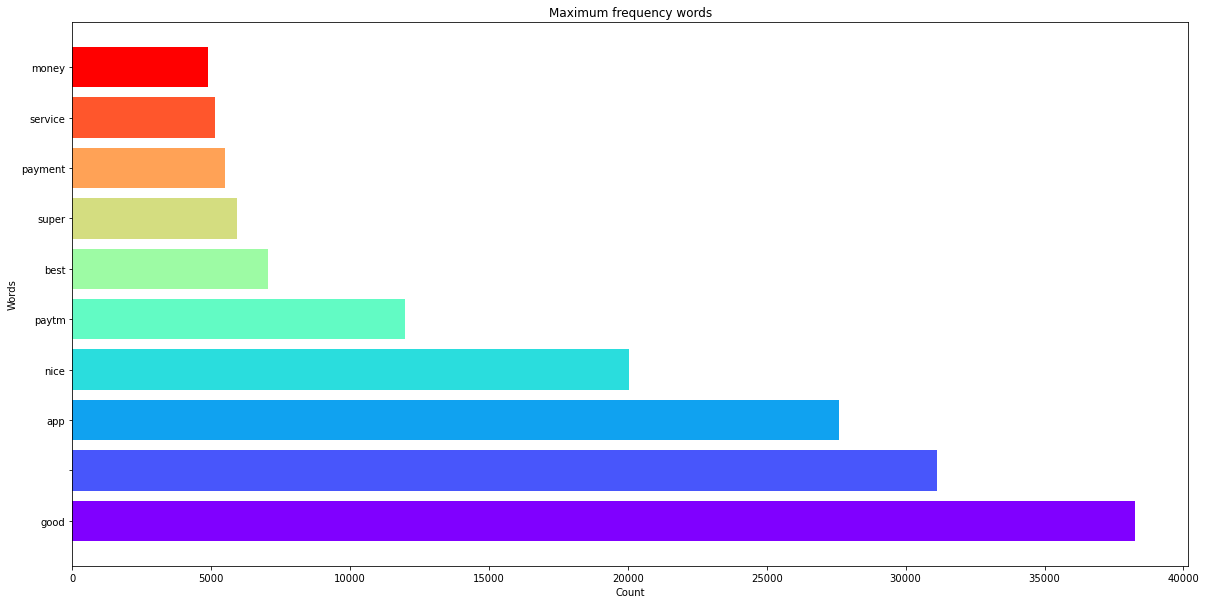

In [211]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Maximum frequency words for Paytm')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [212]:
Phonepay["Content_nopuncuation"] = Phonepay['content'].str.replace('[^\w\s]','')
Phonepay['Content_'] = Phonepay['Content_nopuncuation'].str.replace('\d+', '')
Phonepay["Content_"] = Phonepay["Content_"].str.lower()
Paytm

<ipython-input-212-d61b1f384327>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-212-d61b1f384327>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Unnamed: 0                                           reviewId  \
0                0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1                1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2                2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3                3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4                4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   
...            ...                                                ...   
137902      137902  gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...   
137903      137903  gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...   
137904      137904  gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...   
137905      137905  gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...   
137906      137906  gp:AOqpTOGE2tN9jd6zjW7p8rt2MUZgmSe_cKre-Cl7Ctt...   

                 userName                                          userImage  \
0           HARSH KASHYAP  https://play-lh.googleusercontent.com/a-/AOh14...   
1       manikeswar shabar  https://play-lh.googleusercontent.com/a-/AOh14...   
2          Rajendra Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
3            Kagga Balaji  https://play-lh.googleusercontent.com/a/AATXAJ...   
4             Ajay Pandey  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
137902   Gajendra Kilbile  https://play-lh.googleusercontent.com/a-/AOh14...   
137903       Pratixa Dhak  https://play-lh.googleusercontent.com/a-/AOh14...   
137904          Srinu Sri  https://play-lh.googleusercontent.com/a-/AOh14...   
137905        Sagar Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
137906          HK RAJPUT  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                  content  score  \
0                                                      Op      5   
1                                                    Good      5   
2                            My paytm wallet app is open       4   
3                                                   Super      5   
4                                                The best      5   
...                                                   ...    ...   
137902                                               Good      5   
137903  Unable to use or reddem cashback points..too b...      1   
137904                                              super      5   
137905                                               Nice      5   
137906                                               Good      5   

        thumbsUpCount reviewCreatedVersion                   at  \
0                   0                  NaN  2021-11-18 18:42:29   
1                   0               9.17.3  2021-11-18 18:41:39   
2                   0               9.17.3  2021-11-18 18:41:35   
3                   0               9.17.3  2021-11-18 18:41:33   
4                   0               9.17.3  2021-11-18 18:41:11   
...               ...                  ...                  ...   
137902              0               9.10.2  2021-07-29 21:29:25   
137903              0                  NaN  2021-07-29 21:28:53   
137904              0                  NaN  2021-07-29 21:27:39   
137905              0               9.10.2  2021-07-29 21:27:20   
137906              0                  NaN  2021-07-29 21:27:00   

                                             replyContent  \
0                                                     NaN   
1                                                     NaN   
2       Hi Rajendra! We’d like to take a closer look a...   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
137902  Awesome! It's been our pleasure. You can also ...   
137903  Hi! We’d like to take a closer look and help y...   

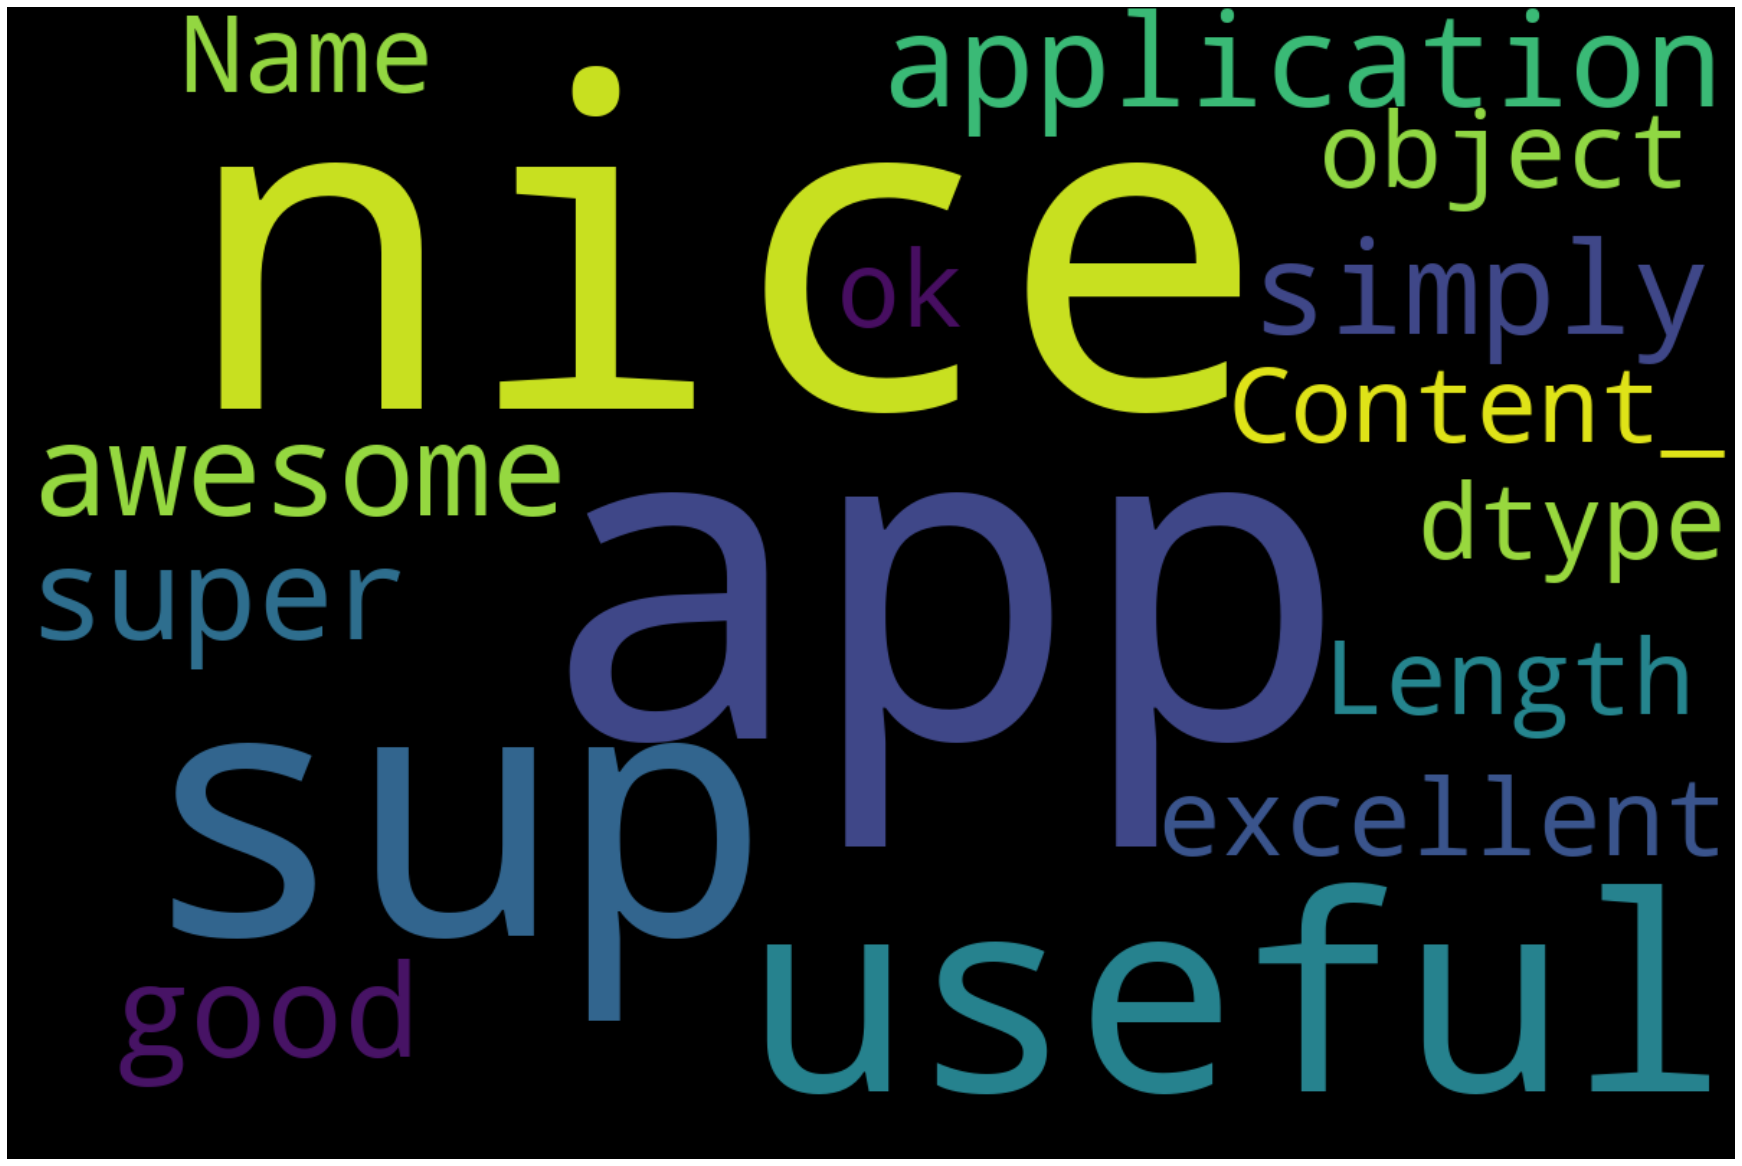

In [213]:
wordcloud = WordCloud(width = 1200, height = 800, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 200,
            min_font_size = 10).generate(str(Phonepay["Content_"]))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [214]:
filtered_words2 = Phonepay["Content_"].apply(lambda x: [word for word in str(x).split(" ") if word not in stopwords])
filtered_words2

0                           [nice, app]
1                                 [sup]
2                                    []
3        [, , , , , , , , , , , , , , ]
4                 [useful, application]
                      ...              
11736                            [good]
11737               [simply, awesome, ]
11738                           [super]
11739                       [excellent]
11740                              [ok]
Name: Content_, Length: 11741, dtype: object

In [216]:
wordcount1 = []
for i in filtered_words2:
    for j in i:
        wordcount1.append(j)
            
counted_words = collections.Counter(wordcount1)
print(counted_words)

Counter({'good': 3450, '': 2498, 'app': 2338, 'nice': 1615, 'super': 574, 'best': 524, 'money': 427, 'excellent': 378, 'use': 373, 'payment': 366, 'phone': 358, 'easy': 310, 'pay': 302, 'phonepe': 301, 'service': 256, 'bad': 256, 'recharge': 232, 'fast': 207, 'transaction': 204, 'time': 201, 'ok': 197, 'account': 193, 'pe': 186, 'please': 181, 'worst': 172, 'hai': 159, 'dont': 157, 'application': 156, 'aap': 150, 'great': 149, 'experience': 144, 'useful': 142, 'transfer': 139, 'working': 139, 'now': 134, 'love': 132, 'extra': 130, 'awesome': 130, 'bank': 125, 'one': 121, 'wallet': 121, 'apps': 117, 'will': 116, 'upi': 113, 'back': 102, 'work': 100, 'problem': 98, 'charge': 97, 'give': 96, 'mobile': 95, 'better': 93, 'amount': 89, 'superb': 89, 'cashback': 85, 'customer': 84, 'cash': 83, 'using': 81, 'rs': 80, 'option': 74, 'issue': 74, 'charging': 73, 'help': 73, 'transactions': 73, 'days': 72, 'charges': 71, 'h': 71, 'much': 71, 'hi': 70, 'every': 68, 'number': 68, 'im': 68, 'amazing'

In [217]:
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

counted_words.most_common(10)

[('good', 3450),
 ('', 2498),
 ('app', 2338),
 ('nice', 1615),
 ('super', 574),
 ('best', 524),
 ('money', 427),
 ('excellent', 378),
 ('use', 373),
 ('payment', 366)]

<BarContainer object of 10 artists>

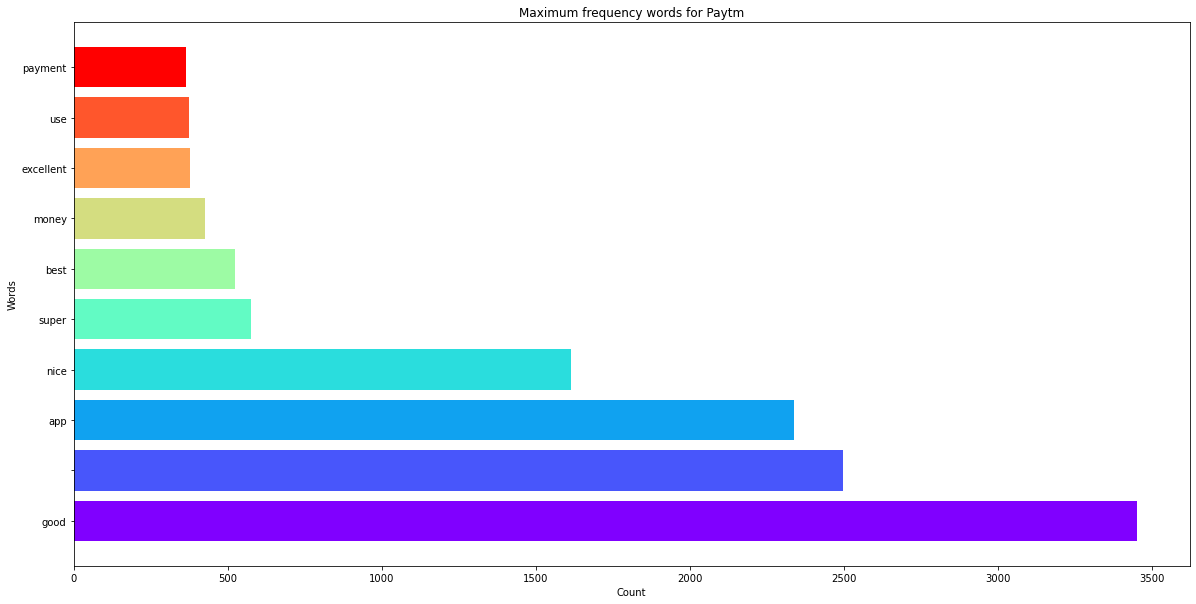

In [218]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Maximum frequency words for Paytm')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [233]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meghabatra/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [253]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [254]:
#filtered_words1 = Paytm["Content_"].apply(lambda x: [word for word in str(x).split(" ") if word not in stopwords])
#bigrams = filtered_words.apply(lambda row: list(map(lambda x:ngrams(x,2), row))) 
bigrams = filtered_words.apply(lambda row: list(nltk.ngrams(row, 2)))

In [255]:
print(bigrams)

0        [(add, boarding), (boarding, pass), (pass, see...
1                                                       []
2                                                       []
3        [(rasy, use), (use, really), (really, never), ...
4        [(still, understand), (understand, restricting...
                               ...                        
34223                                        [(good, app)]
34224                     [(excellent, easy), (easy, use)]
34225                                        [(easy, use)]
34226                                                   []
34227                                                   []
Name: Content_, Length: 34228, dtype: object


In [266]:
#Gpay['bigrams1'] = Gpay['Content_'].apply(lambda row: list(map(lambda x:ngrams(x,2), row))) 
bigrams1 = filtered_words1.apply(lambda row: list(nltk.ngrams(row, 2)))

In [267]:
print(bigrams1)

0                                                        []
1                                                        []
2         [(paytm, wallet), (wallet, app), (app, open), ...
3                                                        []
4                                                        []
                                ...                        
137902                                                   []
137903    [(unable, use), (use, reddem), (reddem, cashba...
137904                                                   []
137905                                                   []
137906                                                   []
Name: Content_, Length: 137907, dtype: object


In [268]:
bigrams2 = filtered_words2.apply(lambda row: list(nltk.ngrams(row, 2)))

In [269]:
print(bigrams2)

0                                            [(nice, app)]
1                                                       []
2                                                       []
3        [(, ), (, ), (, ), (, ), (, ), (, ), (, ), (, ...
4                                  [(useful, application)]
                               ...                        
11736                                                   []
11737                     [(simply, awesome), (awesome, )]
11738                                                   []
11739                                                   []
11740                                                   []
Name: Content_, Length: 11741, dtype: object


/Users/meghabatra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

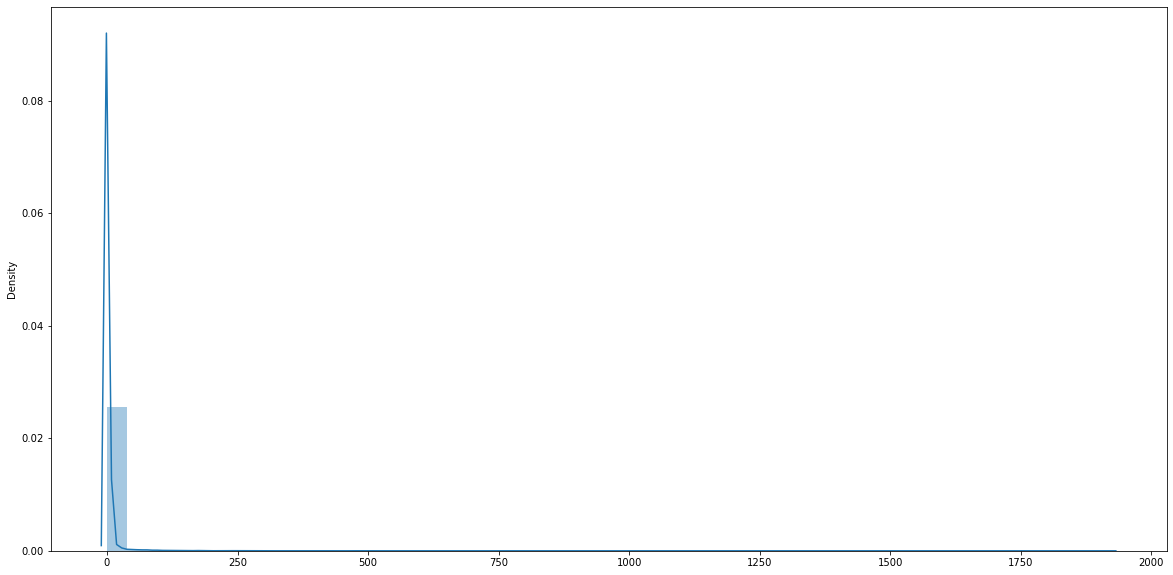

In [273]:
#outliers in thumbsUpCount
sns.distplot(x=Gpay["thumbsUpCount"])

<AxesSubplot:xlabel='thumbsUpCount'>

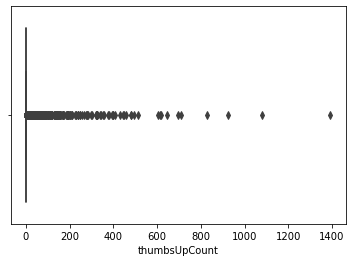

In [462]:
sns.boxplot(x=Paytm["thumbsUpCount"])

<AxesSubplot:xlabel='thumbsUpCount'>

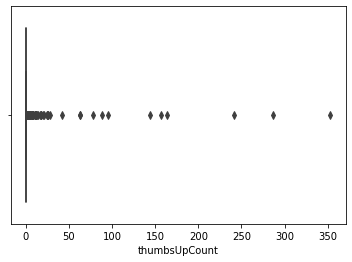

In [463]:
sns.boxplot(x=Phonepay["thumbsUpCount"])

In [464]:
Gpay = Gpay[Gpay["thumbsUpCount"] <= 500]
Paytm=Paytm[Paytm["thumbsUpCount"]<= 500]
Phonepay = Phonepay[Phonepay["thumbsUpCount"] <= 100]

In [465]:
Gpay["replyContent"] = Gpay["replyContent"].fillna("No Reply")

In [466]:
Gpay["repliedAt"] = Gpay["repliedAt"].fillna("No Data")

In [467]:
Gpay

Unnamed: 0                                           reviewId  \
0               0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1               1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2               2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3               3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4               4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   
...           ...                                                ...   
34223       34223  gp:AOqpTOEXYnopFG3RZ8fVrBC9yqXnVjmhnDI0Ji99tXb...   
34224       34224  gp:AOqpTOEVXSkb09ThJsY2TZ0awLgMSCO0qzySxtcT7x9...   
34225       34225  gp:AOqpTOHv3DyIxgg2a61I_QQGgjbFodIUp6UlaUpd4M9...   
34226       34226  gp:AOqpTOHEnAmESklDXdnvO13QBDl9gOlH4M1qQs-gMYS...   
34227       34227  gp:AOqpTOHfgaMoLANmo4v7W91hqWvHFJ7ogUmKQ7fvcNo...   

             userName                                          userImage  \
0          Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   
1      Benjamin Silva  https://play-lh.googleusercontent.com/a/AATXAJ...   
2        PARVESH MIAR  https://play-lh.googleusercontent.com/a-/AOh14...   
3            Mikko L.  https://play-lh.googleusercontent.com/a-/AOh14...   
4       A Google user  https://play-lh.googleusercontent.com/EGemoI2N...   
...               ...                                                ...   
34223     Daran Smith  https://play-lh.googleusercontent.com/a-/AOh14...   
34224       Judi Anne  https://play-lh.googleusercontent.com/a-/AOh14...   
34225       Noori Lal  https://play-lh.googleusercontent.com/a-/AOh14...   
34226   Josh Phillips  https://play-lh.googleusercontent.com/a-/AOh14...   
34227   Saeed Aljasmi  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                                 content  score  \
0       How do add a boarding pass? I see no passes tab.      1   
1                                                   Best      5   
2                                                 All ok      5   
3      Rasy to use really... But there never, ever sh...      3   
4      I still do not understand why your restricting...      3   
...                                                  ...    ...   
34223                                   Like it good app      5   
34224                         Excellent very easy to use      5   
34225                                       Easy to use.      5   
34226                                Works how it should      5   
34227                                               Best      5   

       thumbsUpCount reviewCreatedVersion                   at  \
0                  0      2.137.401329300  2021-11-18 17:03:06   
1                  0      2.134.392709498  2021-11-18 16:43:34   
2                  0      2.138.406141160  2021-11-18 16:12:42   
3                  0      2.138.406141160  2021-11-18 16:06:35   
4                251      2.134.392709498  2021-11-18 15:48:08   
...              ...                  ...                  ...   
34223              0       2.96.264233179  2019-10-01 02:47:10   
34224              0       2.95.262992467  2019-10-01 02:38:48   
34225              0       2.96.264233179  2019-10-01 02:17:54   
34226              0       2.96.264233179  2019-10-01 02:09:34   
34227              0       2.96.264233179  2019-10-01 02:06:57   

                                            replyContent            repliedAt  
0      Hi Len. Could you try the steps in this guide ...  2021-11-18 17:27:11  
1                                               No Reply              No Data  
2                                               No Reply              No Data  
3                                               No Reply              No Data  
4                                               No Reply              No Data  
...                                                  ...                  ...  
34223                                           No Reply              N

In [468]:
Paytm["replyContent"] = Paytm["replyContent"].fillna("No Reply")
Paytm["repliedAt"] = Paytm["repliedAt"].fillna("No Data")
Paytm

<ipython-input-468-675e55855c06>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-468-675e55855c06>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0                                           reviewId  \
0                0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1                1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2                2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3                3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4                4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   
...            ...                                                ...   
137902      137902  gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...   
137903      137903  gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...   
137904      137904  gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...   
137905      137905  gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...   
137906      137906  gp:AOqpTOGE2tN9jd6zjW7p8rt2MUZgmSe_cKre-Cl7Ctt...   

                 userName                                          userImage  \
0           HARSH KASHYAP  https://play-lh.googleusercontent.com/a-/AOh14...   
1       manikeswar shabar  https://play-lh.googleusercontent.com/a-/AOh14...   
2          Rajendra Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
3            Kagga Balaji  https://play-lh.googleusercontent.com/a/AATXAJ...   
4             Ajay Pandey  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
137902   Gajendra Kilbile  https://play-lh.googleusercontent.com/a-/AOh14...   
137903       Pratixa Dhak  https://play-lh.googleusercontent.com/a-/AOh14...   
137904          Srinu Sri  https://play-lh.googleusercontent.com/a-/AOh14...   
137905        Sagar Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
137906          HK RAJPUT  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                  content  score  \
0                                                      Op      5   
1                                                    Good      5   
2                            My paytm wallet app is open       4   
3                                                   Super      5   
4                                                The best      5   
...                                                   ...    ...   
137902                                               Good      5   
137903  Unable to use or reddem cashback points..too b...      1   
137904                                              super      5   
137905                                               Nice      5   
137906                                               Good      5   

        thumbsUpCount reviewCreatedVersion                   at  \
0                   0                  NaN  2021-11-18 18:42:29   
1                   0               9.17.3  2021-11-18 18:41:39   
2                   0               9.17.3  2021-11-18 18:41:35   
3                   0               9.17.3  2021-11-18 18:41:33   
4                   0               9.17.3  2021-11-18 18:41:11   
...               ...                  ...                  ...   
137902              0               9.10.2  2021-07-29 21:29:25   
137903              0                  NaN  2021-07-29 21:28:53   
137904              0                  NaN  2021-07-29 21:27:39   
137905              0               9.10.2  2021-07-29 21:27:20   
137906              0                  NaN  2021-07-29 21:27:00   

                                             replyContent            repliedAt  
0                                                No Reply              No Data  
1                                                No Reply              No Data  
2       Hi Rajendra! We’d like to take a closer look a...  2021-11-18 16:14:32  
3                                                No Reply              No Data  
4                                                No Reply              No Data  
...                                                   ...     

In [469]:
Phonepay["replyContent"] = Phonepay["replyContent"].fillna("No Reply")
Phonepay["repliedAt"] = Phonepay["repliedAt"].fillna("No Data")
Phonepay

<ipython-input-469-390cdab4ccf3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-469-390cdab4ccf3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0                                           reviewId  \
0               0  gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...   
1               1  gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...   
2               2  gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...   
3               3  gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...   
4               4  gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...   
...           ...                                                ...   
11736       11736  gp:AOqpTOEI3U9pLM_RUp8LcwRgbDyaImBZQlgPh1lhVUA...   
11737       11737  gp:AOqpTOFuSV_9Lt31JbHaR000CauJbntWPTdISIwneYE...   
11738       11738  gp:AOqpTOEdjlMnAP0bMX4oKZ2eOEUtZvfJjzGjsljWCKK...   
11739       11739  gp:AOqpTOH6bRKH7nM-B6306EUk-mSMrKejmGMyDm2u-iK...   
11740       11740  gp:AOqpTOEMimszwKu5Az9tXim_1Wd0snjEVVmA_7JfIup...   

                 userName                                          userImage  \
0               Akki Love  https://play-lh.googleusercontent.com/a/AATXAJ...   
1          datta samindar  https://play-lh.googleusercontent.com/a-/AOh14...   
2            Rahul Jadhav  https://play-lh.googleusercontent.com/a-/AOh14...   
3          Rao Farman Ali  https://play-lh.googleusercontent.com/a-/AOh14...   
4          Tapaswini Rana  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
11736         Ashok Pawar  https://play-lh.googleusercontent.com/a-/AOh14...   
11737         Tabish Khan  https://play-lh.googleusercontent.com/a-/AOh14...   
11738  Kiran Shinde Patil  https://play-lh.googleusercontent.com/a-/AOh14...   
11739          The Indian  https://play-lh.googleusercontent.com/a-/AOh14...   
11740  Nageshwarao Samala  https://play-lh.googleusercontent.com/a/AATXAJ...   

                  content  score  thumbsUpCount reviewCreatedVersion  \
0                Nice app      5              0               4.0.18   
1                     Sup      5              0                  NaN   
2                              1              0               4.1.23   
3                              1              0               4.1.25   
4      Useful application      5              0               4.1.25   
...                   ...    ...            ...                  ...   
11736                good      5              0               4.1.25   
11737     Simply awesome       5              0               4.1.25   
11738               Super      1              0               4.1.25   
11739           Excellent      5              0               4.1.18   
11740                  Ok      4              0               4.1.25   

                        at                                       replyContent  \
0      2021-11-18 18:37:42                                           No Reply   
1      2021-11-18 18:37:35                                           No Reply   
2      2021-11-18 18:36:58                                           No Reply   
3      2021-11-18 18:36:22                                           No Reply   
4      2021-11-18 18:35:39                                           No Reply   
...                    ...                                                ...   
11736  2021-11-10 15:27:29                                           No Reply   
11737  2021-11-10 15:27:27                                           No Reply   
11738  2021-11-10 15:26:55  Thank you for the feedback, Kiran. We work har...   
11739  2021-11-10 15:23:32                                           No Reply   
11740  2021-11-10 15:22:05                                           No Reply   

                 repliedAt  
0                  No Data  
1                  No Data  
2                  No Data  
3                  No Data  
4                  No Data  
...                    ...  
11736              No Data  
11737              No Data  
11738  2021-11-10 15:40:13  
11739              No Data  
11740              No Da

In [471]:
Gpay["reply_given"] = Gpay["replyContent"].apply(lambda x : "Reply Given" if x!= "No Reply" else "No Reply")
Gpay

Unnamed: 0                                           reviewId  \
0               0  gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...   
1               1  gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...   
2               2  gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...   
3               3  gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...   
4               4  gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...   
...           ...                                                ...   
34223       34223  gp:AOqpTOEXYnopFG3RZ8fVrBC9yqXnVjmhnDI0Ji99tXb...   
34224       34224  gp:AOqpTOEVXSkb09ThJsY2TZ0awLgMSCO0qzySxtcT7x9...   
34225       34225  gp:AOqpTOHv3DyIxgg2a61I_QQGgjbFodIUp6UlaUpd4M9...   
34226       34226  gp:AOqpTOHEnAmESklDXdnvO13QBDl9gOlH4M1qQs-gMYS...   
34227       34227  gp:AOqpTOHfgaMoLANmo4v7W91hqWvHFJ7ogUmKQ7fvcNo...   

             userName                                          userImage  \
0          Len Pagnam  https://play-lh.googleusercontent.com/a-/AOh14...   
1      Benjamin Silva  https://play-lh.googleusercontent.com/a/AATXAJ...   
2        PARVESH MIAR  https://play-lh.googleusercontent.com/a-/AOh14...   
3            Mikko L.  https://play-lh.googleusercontent.com/a-/AOh14...   
4       A Google user  https://play-lh.googleusercontent.com/EGemoI2N...   
...               ...                                                ...   
34223     Daran Smith  https://play-lh.googleusercontent.com/a-/AOh14...   
34224       Judi Anne  https://play-lh.googleusercontent.com/a-/AOh14...   
34225       Noori Lal  https://play-lh.googleusercontent.com/a-/AOh14...   
34226   Josh Phillips  https://play-lh.googleusercontent.com/a-/AOh14...   
34227   Saeed Aljasmi  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                                 content  score  \
0       How do add a boarding pass? I see no passes tab.      1   
1                                                   Best      5   
2                                                 All ok      5   
3      Rasy to use really... But there never, ever sh...      3   
4      I still do not understand why your restricting...      3   
...                                                  ...    ...   
34223                                   Like it good app      5   
34224                         Excellent very easy to use      5   
34225                                       Easy to use.      5   
34226                                Works how it should      5   
34227                                               Best      5   

       thumbsUpCount reviewCreatedVersion                   at  \
0                  0      2.137.401329300  2021-11-18 17:03:06   
1                  0      2.134.392709498  2021-11-18 16:43:34   
2                  0      2.138.406141160  2021-11-18 16:12:42   
3                  0      2.138.406141160  2021-11-18 16:06:35   
4                251      2.134.392709498  2021-11-18 15:48:08   
...              ...                  ...                  ...   
34223              0       2.96.264233179  2019-10-01 02:47:10   
34224              0       2.95.262992467  2019-10-01 02:38:48   
34225              0       2.96.264233179  2019-10-01 02:17:54   
34226              0       2.96.264233179  2019-10-01 02:09:34   
34227              0       2.96.264233179  2019-10-01 02:06:57   

                                            replyContent            repliedAt  \
0      Hi Len. Could you try the steps in this guide ...  2021-11-18 17:27:11   
1                                               No Reply              No Data   
2                                               No Reply              No Data   
3                                               No Reply              No Data   
4                                               No Reply              No Data   
...                                                  ...                  ...   
34223                                           No Reply        

In [472]:
G = Gpay["reply_given"].value_counts().reset_index()
G

index  reply_given
0     No Reply        28106
1  Reply Given         6107

In [473]:
G.columns = ["Reply_type", "Reply_given"]


<AxesSubplot:xlabel='Reply_type', ylabel='Reply_given'>

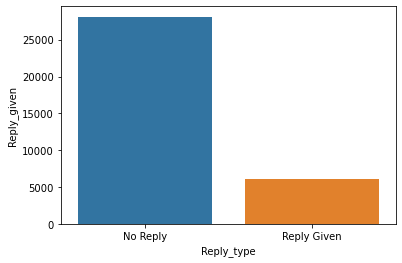

In [474]:
sns.barplot(x= "Reply_type", y="Reply_given",
        data=G)

In [475]:
Paytm["reply_given"] = Paytm["replyContent"].apply(lambda x : "Reply Given" if x!= "No Reply" else "No Reply")
Paytm

<ipython-input-475-3dce6475e8cf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0                                           reviewId  \
0                0  gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...   
1                1  gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...   
2                2  gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...   
3                3  gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...   
4                4  gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...   
...            ...                                                ...   
137902      137902  gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...   
137903      137903  gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...   
137904      137904  gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...   
137905      137905  gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...   
137906      137906  gp:AOqpTOGE2tN9jd6zjW7p8rt2MUZgmSe_cKre-Cl7Ctt...   

                 userName                                          userImage  \
0           HARSH KASHYAP  https://play-lh.googleusercontent.com/a-/AOh14...   
1       manikeswar shabar  https://play-lh.googleusercontent.com/a-/AOh14...   
2          Rajendra Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
3            Kagga Balaji  https://play-lh.googleusercontent.com/a/AATXAJ...   
4             Ajay Pandey  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
137902   Gajendra Kilbile  https://play-lh.googleusercontent.com/a-/AOh14...   
137903       Pratixa Dhak  https://play-lh.googleusercontent.com/a-/AOh14...   
137904          Srinu Sri  https://play-lh.googleusercontent.com/a-/AOh14...   
137905        Sagar Kumar  https://play-lh.googleusercontent.com/a/AATXAJ...   
137906          HK RAJPUT  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                  content  score  \
0                                                      Op      5   
1                                                    Good      5   
2                            My paytm wallet app is open       4   
3                                                   Super      5   
4                                                The best      5   
...                                                   ...    ...   
137902                                               Good      5   
137903  Unable to use or reddem cashback points..too b...      1   
137904                                              super      5   
137905                                               Nice      5   
137906                                               Good      5   

        thumbsUpCount reviewCreatedVersion                   at  \
0                   0                  NaN  2021-11-18 18:42:29   
1                   0               9.17.3  2021-11-18 18:41:39   
2                   0               9.17.3  2021-11-18 18:41:35   
3                   0               9.17.3  2021-11-18 18:41:33   
4                   0               9.17.3  2021-11-18 18:41:11   
...               ...                  ...                  ...   
137902              0               9.10.2  2021-07-29 21:29:25   
137903              0                  NaN  2021-07-29 21:28:53   
137904              0                  NaN  2021-07-29 21:27:39   
137905              0               9.10.2  2021-07-29 21:27:20   
137906              0                  NaN  2021-07-29 21:27:00   

                                             replyContent  \
0                                                No Reply   
1                                                No Reply   
2       Hi Rajendra! We’d like to take a closer look a...   
3                                                No Reply   
4                                                No Reply   
...                                                   ...   
137902  Awesome! It's been our pleasure. You can also ...   
137903  Hi! We’d like to take a closer look and help y...   

In [476]:
Pay = Paytm["reply_given"].value_counts().reset_index()
Pay

index  reply_given
0     No Reply        69776
1  Reply Given        68120

<AxesSubplot:xlabel='Reply_type', ylabel='Reply_given'>

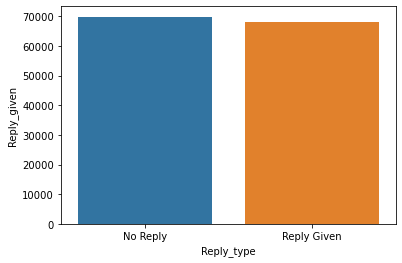

In [478]:
Pay.columns = ["Reply_type", "Reply_given"]
sns.barplot(x= "Reply_type", y="Reply_given",
        data=Pay)

In [480]:
Phonepay["reply_given"] = Phonepay["replyContent"].apply(lambda x : "Reply Given" if x!= "No Reply" else "No Reply")
Phonepay

<ipython-input-480-8c4f945fa15e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0                                           reviewId  \
0               0  gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...   
1               1  gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...   
2               2  gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...   
3               3  gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...   
4               4  gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...   
...           ...                                                ...   
11736       11736  gp:AOqpTOEI3U9pLM_RUp8LcwRgbDyaImBZQlgPh1lhVUA...   
11737       11737  gp:AOqpTOFuSV_9Lt31JbHaR000CauJbntWPTdISIwneYE...   
11738       11738  gp:AOqpTOEdjlMnAP0bMX4oKZ2eOEUtZvfJjzGjsljWCKK...   
11739       11739  gp:AOqpTOH6bRKH7nM-B6306EUk-mSMrKejmGMyDm2u-iK...   
11740       11740  gp:AOqpTOEMimszwKu5Az9tXim_1Wd0snjEVVmA_7JfIup...   

                 userName                                          userImage  \
0               Akki Love  https://play-lh.googleusercontent.com/a/AATXAJ...   
1          datta samindar  https://play-lh.googleusercontent.com/a-/AOh14...   
2            Rahul Jadhav  https://play-lh.googleusercontent.com/a-/AOh14...   
3          Rao Farman Ali  https://play-lh.googleusercontent.com/a-/AOh14...   
4          Tapaswini Rana  https://play-lh.googleusercontent.com/a/AATXAJ...   
...                   ...                                                ...   
11736         Ashok Pawar  https://play-lh.googleusercontent.com/a-/AOh14...   
11737         Tabish Khan  https://play-lh.googleusercontent.com/a-/AOh14...   
11738  Kiran Shinde Patil  https://play-lh.googleusercontent.com/a-/AOh14...   
11739          The Indian  https://play-lh.googleusercontent.com/a-/AOh14...   
11740  Nageshwarao Samala  https://play-lh.googleusercontent.com/a/AATXAJ...   

                  content  score  thumbsUpCount reviewCreatedVersion  \
0                Nice app      5              0               4.0.18   
1                     Sup      5              0                  NaN   
2                              1              0               4.1.23   
3                              1              0               4.1.25   
4      Useful application      5              0               4.1.25   
...                   ...    ...            ...                  ...   
11736                good      5              0               4.1.25   
11737     Simply awesome       5              0               4.1.25   
11738               Super      1              0               4.1.25   
11739           Excellent      5              0               4.1.18   
11740                  Ok      4              0               4.1.25   

                        at                                       replyContent  \
0      2021-11-18 18:37:42                                           No Reply   
1      2021-11-18 18:37:35                                           No Reply   
2      2021-11-18 18:36:58                                           No Reply   
3      2021-11-18 18:36:22                                           No Reply   
4      2021-11-18 18:35:39                                           No Reply   
...                    ...                                                ...   
11736  2021-11-10 15:27:29                                           No Reply   
11737  2021-11-10 15:27:27                                           No Reply   
11738  2021-11-10 15:26:55  Thank you for the feedback, Kiran. We work har...   
11739  2021-11-10 15:23:32                                           No Reply   
11740  2021-11-10 15:22:05                                           No Reply   

                 repliedAt  reply_given  
0                  No Data     No Reply  
1                  No Data     No Reply  
2                  No Data     No Reply  
3                  No Data     No Reply  
4                  No Data     No Reply  
...                    ...          ...  
11736              No Data     No Reply  
11737  

In [481]:
Phone = Phonepay["reply_given"].value_counts().reset_index()
Phone

index  reply_given
0     No Reply         8803
1  Reply Given         2932

<AxesSubplot:xlabel='Reply_type', ylabel='Reply_given'>

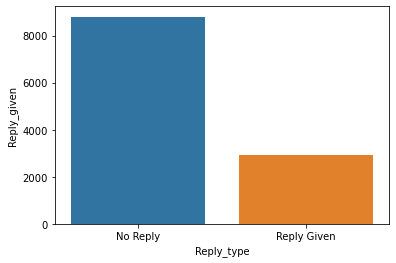

In [482]:
Phone.columns = ["Reply_type", "Reply_given"]
sns.barplot(x= "Reply_type", y="Reply_given",
        data=Phone)

[Text(0.5, 1.0, 'Number of births each year')]

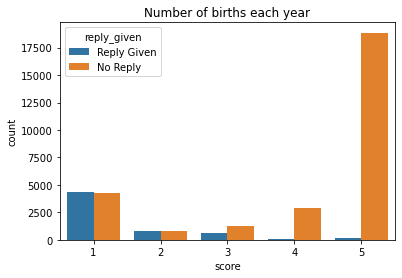

In [484]:
sns.countplot(x="score", hue="reply_given", data=Gpay).set(title='Number of births each year')

[Text(0.5, 1.0, 'Number of births each year')]

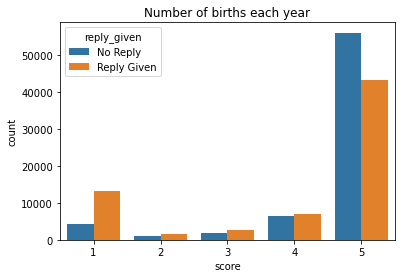

In [486]:
sns.countplot(x="score", hue="reply_given", data=Paytm).set(title='Number of births each year')

[Text(0.5, 1.0, 'Number of births each year')]

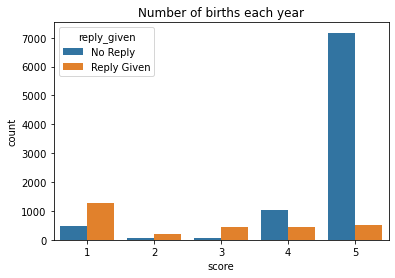

In [487]:
sns.countplot(x="score", hue="reply_given", data=Phonepay).set(title='Number of births each year')